In [1]:
# Install TensorFlow
#!pip install --upgrade tensorflow
#!pip install -q tensorflow-gpu
!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [0]:
# Other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

In [3]:
# Load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# Data Preprocessing

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train.shape

(60000, 28, 28)

In [0]:
# Need to convert a height x width x color
x_train = np.expand_dims(x_train, -1)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [0]:
# Do the same for x_test
x_test = np.expand_dims(x_test, -1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
print(len(set(y_train)))

10


# Build Model

In [11]:
D = x_train[0].shape
print("D: ", D)
k = len(set(y_train))
print("k: ", k)

D:  (28, 28, 1)
k:  10


In [0]:
# Create model
i = Input(shape=D) # Convolution expects Height x Width x Color
x = Conv2D(32, kernel_size=(3, 3), strides=2, activation='relu')(i) # 32 feature maps
x = Conv2D(64, kernel_size=(3, 3), strides=2, activation='relu')(x) # 64 feature maps
x = Conv2D(128, kernel_size=(3, 3), strides=2, activation='relu')(x) # 128 feature maps
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fit model
r = model.fit(x_train, y_train,
              validation_data = (x_test, y_test),
              epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5239 - accuracy: 0.8066 - val_loss: 0.3956 - val_accuracy: 0.8528
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3643 - accuracy: 0.8643 - val_loss: 0.3411 - val_accuracy: 0.8692
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3153 - accuracy: 0.8815 - val_loss: 0.3213 - val_accuracy: 0.8838
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2823 - accuracy: 0.8925 - val_loss: 0.3005 - val_accuracy: 0.8894
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2552 - accuracy: 0.9046 - val_loss: 0.3017 - val_accuracy: 0.8904
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2342 - accuracy: 0.9112 - val_loss: 0.2838 - val_accuracy: 0.8972
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2134 - accuracy: 0.9196 - val_loss: 0.2790 - val_accuracy:

# Evaluate Model

Validation loss is increasing, so there is overfitting


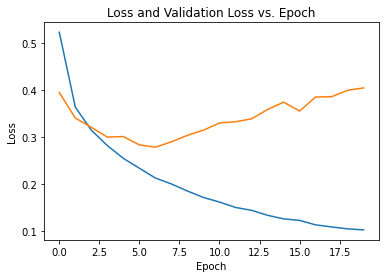

In [18]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loval_lossss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

print("Validation loss is increasing, so there is overfitting")

The model is very confident in its incorrect predictions


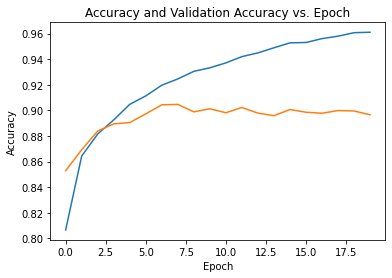

In [19]:
# Plot the loss
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title("Accuracy and Validation Accuracy vs. Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

print("The model is very confident in its incorrect predictions")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(33.0, 0.5, 'True Label')

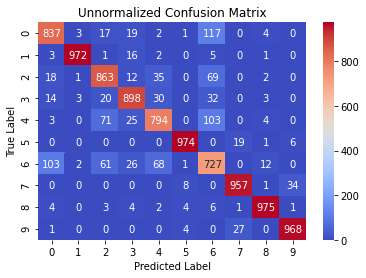

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test).argmax(axis=1) # Need to take argmax to get class number with highest probability for each sample
colormap = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(colormap, annot=True, fmt='d', cmap='coolwarm')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

(10, 10)
(10, 10)


Text(69.0, 0.5, 'True Label')

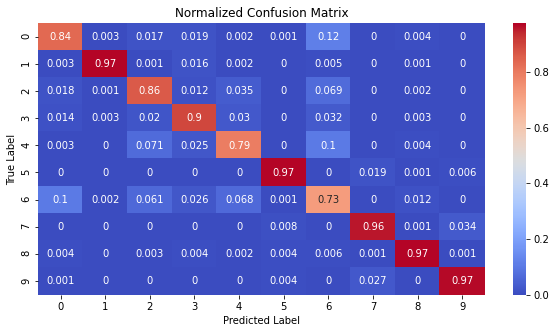

In [27]:
# Plot normalized confusion matrix
plt.figure(figsize=(10,5))
colormap_normalized = colormap.astype('float') / colormap.sum(axis=1)
print(colormap.shape)
print(colormap_normalized.shape)
plt.figure
ax = sns.heatmap(colormap_normalized, annot=True, cmap='coolwarm')
ax.set_title("Normalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

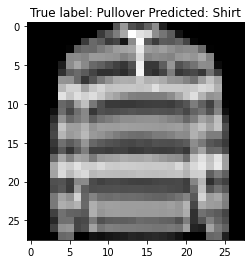

In [26]:
# Show some misclassified examples
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]));